In [1]:
import numpy as np
import operator
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### KNN classifier

In [2]:
#Euclidean Dist
def euc_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

#KNN
class KNN:

  def __init__(self, K):
    self.K = K

  def fit(self, x_train, y_train):
    self.X_train = x_train
    self.Y_train = y_train

  def predict(self, X_test):
    predictions = []
    for i in range(len(X_test)):
      dist = np.array([euc_dist(self.X_train[i], x_t) for x_t in self.X_train])
      dist_sorted = dist.argsort()[:self.K]
      neigh_count = {}
      for idx in dist_sorted:
        if self.Y_train[idx] in neigh_count:
          neigh_count[self.Y_train[idx]]+=1
        else:
          neigh_count[self.Y_train[idx]]=1
      sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
      predictions.append(sorted_neigh_count[0][0])
    return predictions

### Loading the dataset

In [3]:
mnist = load_digits()

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


### Using sklearn.neighbours and cross_val_score

In [4]:
from sklearn.neighbors import KNeighborsClassifier

k_val = np.arange(3,100,2)
acc = []

for k in k_val:
  model = KNeighborsClassifier(n_neighbors=k)
  accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  acc.append(accuracy.mean())

# Choosing the k corresponding to the highest accuracy
max = acc.index(max(acc))
k = k_val[max]
print(k)

3


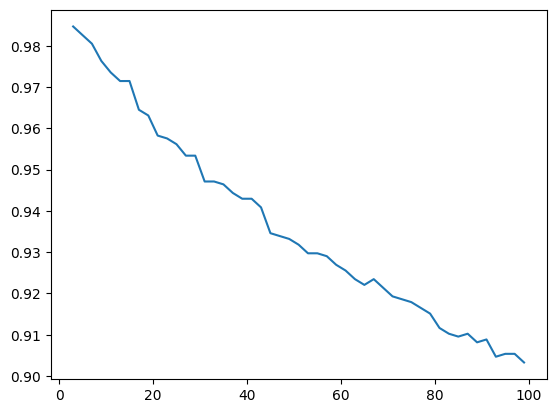

In [5]:
plt.plot(k_val, acc)
plt.show()

In [6]:
final_model = KNeighborsClassifier(n_neighbors = k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9833333333333333